<a href="https://colab.research.google.com/github/AntonioSergioSantana/Analise-de-serie-temporal/blob/main/timeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Série Temporal

Uma série temporal é uma sequência de realizações (observações) de uma variável ao longo do tempo. Dito de outra forma, é uma sequência de pontos (dados numéricos) em ordem sucessiva, geralmente ocorrendo em intervalos uniformes. Portanto, uma série temporal é uma sequência de números coletados em intervalos regulares durante um período de tempo.

#**Bibliotecas**

In [ ]:
#Bibliotcas
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Configurações globais para o estilo do gráfico
plt.rcParams['axes.facecolor'] = 'lightgray'  # Cor de fundo do gráfico

##Importação do Arquivo CSV

Para fazer esse estudo utilizaremos um arquivo CSV chamado timeline que representa os *trending topics* de pesquisa na internet.

In [ ]:
#Importação do arquivo
df=pd.read_csv('/content/timeline.csv')

In [ ]:
#Analise das primeiras linhas do dataset
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


O arquivo possui informações mensais sobre pesquisas de determinados assuntos na internet e sua popularidade. Os tópicos aqui foram: Diet(dieta), Gym (acadêmia), Finance(finanças).

In [ ]:
#Informações sobre tipo, valores nulos e quantidades
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   month    168 non-null    object
 1   diet     168 non-null    int64 
 2   gym      168 non-null    int64 
 3   finance  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


In [ ]:
df.shape

(168, 4)

In [ ]:
df.isnull().sum()

month      0
diet       0
gym        0
finance    0
dtype: int64

##Transformações do dataset

A  1º transformação necessária (essencial) para trabalhar com séries temporais e o eixo do tempo, neste dataset a variável month que representa o mês esta configurada como object (string). Precisamos converte-la para tempo e usaremos a função datetime do Pandas.

In [ ]:
# Utilizando a função datetime para transformar a variável month em tempo.
df.month=pd.to_datetime(df.month)

In [ ]:
#checando a transformação
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   month    168 non-null    datetime64[ns]
 1   diet     168 non-null    int64         
 2   gym      168 non-null    int64         
 3   finance  168 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.4 KB


A 2ª transformação é substituir o índice automático pela coluna month

In [ ]:
#Alterando o índice
df.set_index('month',inplace=True)

In [ ]:
#checando a transformação
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


A coluna de mês passa a ser nosso índice.

##Plotando as séries temporais

Vamos plotar em um gráfico de linhas a série temporal dos 3 elementos.

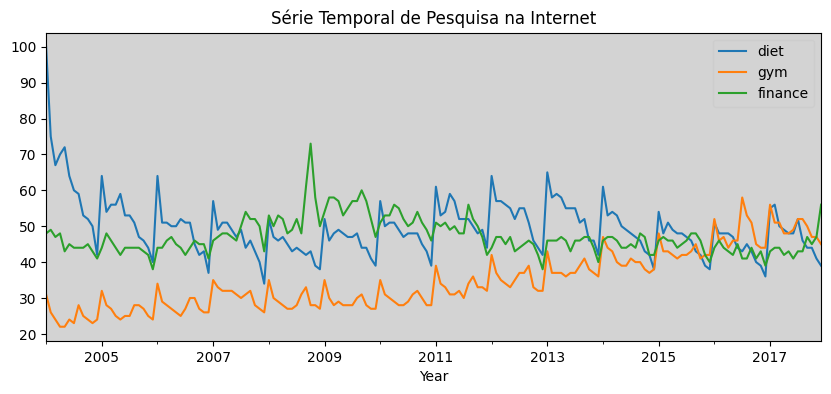

In [ ]:
df.plot(figsize=(10,4))
plt.title('Série Temporal de Pesquisa na Internet')
plt.xlabel('Year')
plt.show()

Observamos três comportamentos distintos entre eles.

Aparantmente a pequisa sobre dieta teve uma diminuição desde o início de 2004 até o final de 2017.

A linha sobre a ginástica tem (aparentemente) um comportamento inverso da dieta, parece que há um crescimento no interesse pelo assunto e a linha sobre finanças mantém-se (aparentemente) estável durante esses anos.

##Análise de tendências

A tendência de uma série temporal é definida como um padrão de crescimento/decrescimento da variável em um certo período de tempo.

Neste caso vamos analisar a série Dieta.

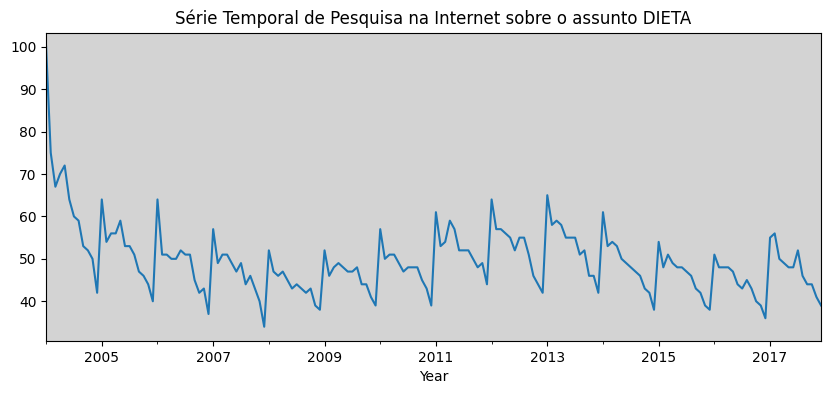

In [ ]:
#Plotando o gráfico de linhas da série Dieta
df.diet.plot(figsize=(10,4))
plt.title('Série Temporal de Pesquisa na Internet sobre o assunto DIETA');
plt.xlabel('Year');

o gráfico plotado não esclarece muito sobre a tendência, vamos checar a presença de ruídos nessa série.

O ruído refere-se a flutuações aleatórias ou variações irregulares nos dados ao longo do tempo, ele pode ser causado por vários fatores, como erros de medição, variações naturais não controláveis ou influências externas imprevisíveis. Para realizar análises ou previsões significativas em séries temporais, é importante separar o ruído dos padrões ou tendências genuínas nos dados, muitas vezes por meio de técnicas estatísticas, como suavização ou modelagem estatística.

Uma forma interessante de se eliminar esses ruídos é através da aplicação de **médias móveis simples**.

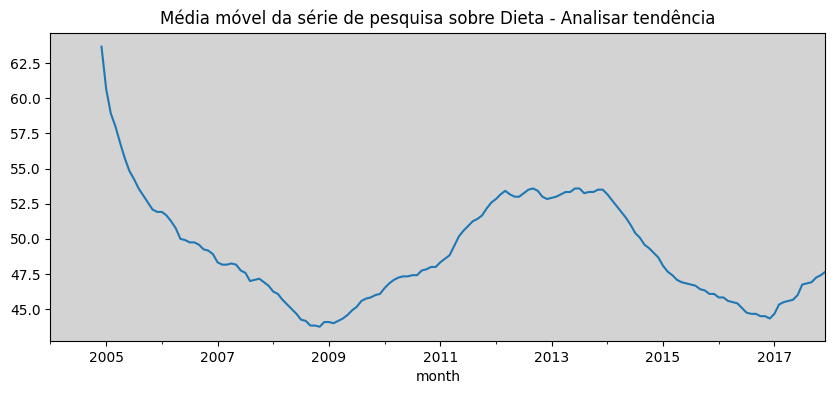

In [ ]:
#Aplicar uma média móvel para analisar a tendência, utilizando 12 períodos
df.diet.rolling(12).mean().plot(figsize=(10,4));
plt.title('Média móvel da série de pesquisa sobre Dieta - Analisar tendência');

Agora com esse gráfico é possível observar claramente que a pesquisa sobre dieta estava em alta em 2014, sofreu uma queda de + de 25% até 2008. De 2009 até 2012 teve um novo crescimento de aprox. 15%, ficando estável até 2014 onde inicia-se mais uma queda voltando a patamares de 2009. Em 2017 retoma-se a tendência de crescimento.

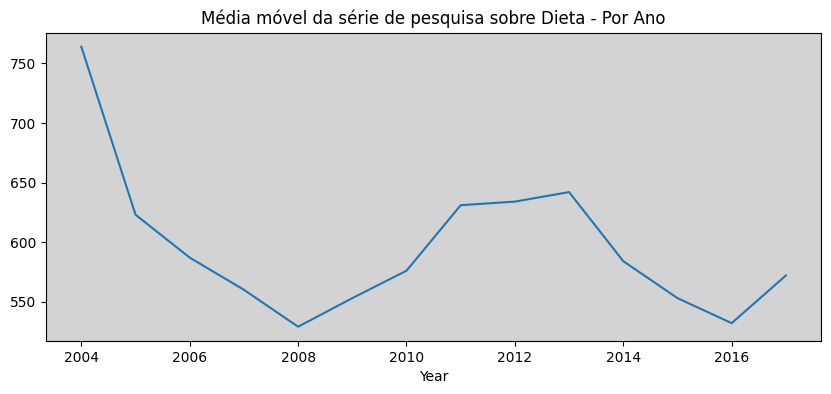

In [ ]:
#Também conseguimos identificar o padrão acima usando o groupby
df.diet.groupby(df.index.year).sum().plot(figsize=(10,4))
plt.title('Média móvel da série de pesquisa sobre Dieta - Por Ano');
plt.xlabel('Year');

Plotando o gráfico, vemos praticamente a mesma tendência.

##Análise de Sazonalidade

Sazonalidade em séries temporais refere-se a padrões recorrentes e previsíveis que ocorrem em intervalos regulares de tempo. Esses padrões se repetem em períodos específicos, como diariamente, mensalmente, trimestralmente ou anualmente. A sazonalidade é geralmente causada por influências sazonais, como estações do ano, feriados ou eventos regulares.

E para analisar esse componente, precisamos elinimar o componente da tendência tentando equilibrar os picos e vales do nosso gráfico.

Uma das formas é aplicando o conceito de **diferenças sucessivas**, que são calculadas subtraindo-se um valor de um período anterior do valor do período atual. Isso ajuda a remover tendências ou padrões de longo prazo, focando nas variações de curto prazo e no ruído nos dados. As diferenças sucessivas podem ser usadas para tornar uma série temporal mais estacionária, facilitando a aplicação de técnicas estatísticas e de modelagem.

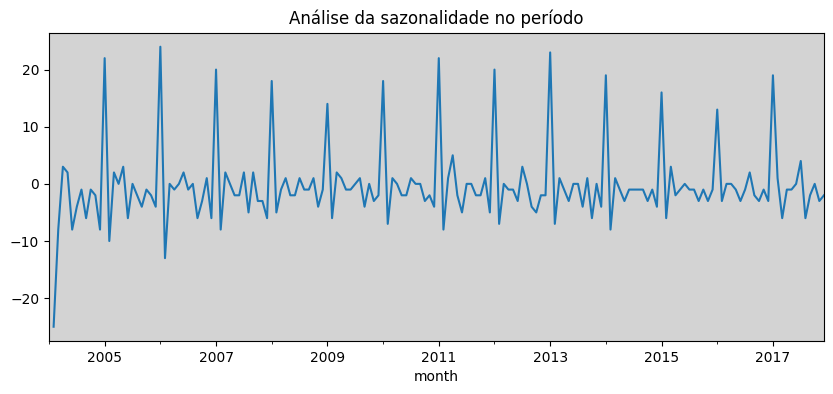

In [ ]:
#Analisando a sazonalidade, aplicando o comando diff.
df.diet.diff().plot(figsize=(10,4))
plt.title('Análise da sazonalidade no período');

a série tá muito grande, vou fazer um filtro de 2005 até 2007 para enchergar a sazolidade

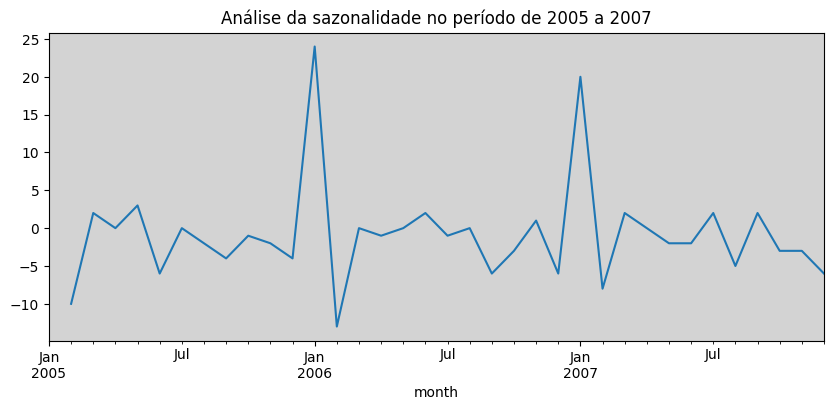

In [ ]:
#Aplicando um filtro no início da série
filtro=(df.index.year >= 2005) & (df.index.year <= 2007)
df[filtro].diet.diff().plot(figsize=(10,4));
plt.title('Análise da sazonalidade no período de 2005 a 2007');

Olhando pra esse gráfico, parece que nos meses de Janeiro temos picos nos números de pesquisa sobre dieta na internet.

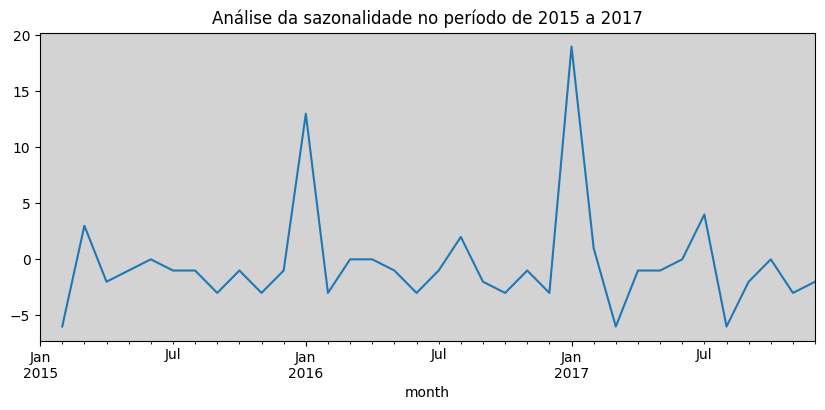

In [ ]:
#Aplicando um filtro no final da série
filtro1=(df.index.year >= 2015) & (df.index.year <= 2017)
df[filtro1].diet.diff().plot(figsize=(10,4));
plt.title('Análise da sazonalidade no período de 2015 a 2017');

fiz a mesma análise no final da série também e um padrão se repete nos meses de Janeiro.

Isso faz sentido se pensarmos que no começo do Ano as pessoas estão fazendo os planos para o ano novo e uma das coisas a se buscar é a melhora da saúde relacionada ao emagrecimento.

Agora quero analisar através de um agrupamento mensal, calculando a média.

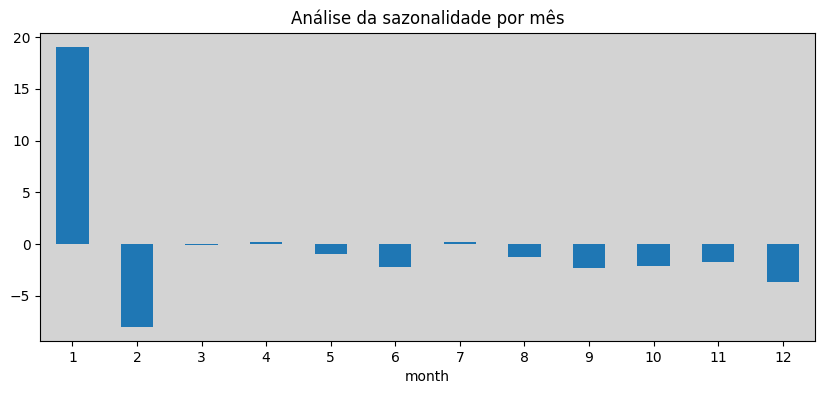

In [ ]:
#Analisando a sazonalidade com agrupamento mensal
df.diet.diff().groupby(df.index.month).mean().plot(figsize=(10,4),kind='bar')
plt.xticks(rotation=0)
plt.title('Análise da sazonalidade por mês');

Aqui é bem claro que o mês 1 (Janeiro) existe uma diferença positivo grande na pesquisa sobre dieta na internet em relação aos outros meses.